In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing and EDA
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Training Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

# Model Analysis
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [4]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# Learning about the dataset

In [5]:
df.shape

(2240, 29)

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The info function shows us some information about our dataset:
* The dataset has 3 categorical variables(object) and 26 numerical variables (float64 and int64)
* We have missing values for the "Income" variable which we will deal with

# Data Preparation and Cleaning

### Missing Data

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

As we can see, the missing values are only present in one column which is "Income" and only contributes to small proportion of the overall dataset (24 out of 2240 observations). Therefore, I have decided to drop these missing values which should not affect the overall dataset much. 

In [10]:
df = df.dropna()

In [11]:
df.duplicated().sum()

0

We don't have duplicated entries so the only cleaning we have to do is dealing with the missing values in the "Income" column.

### Outlier Handling

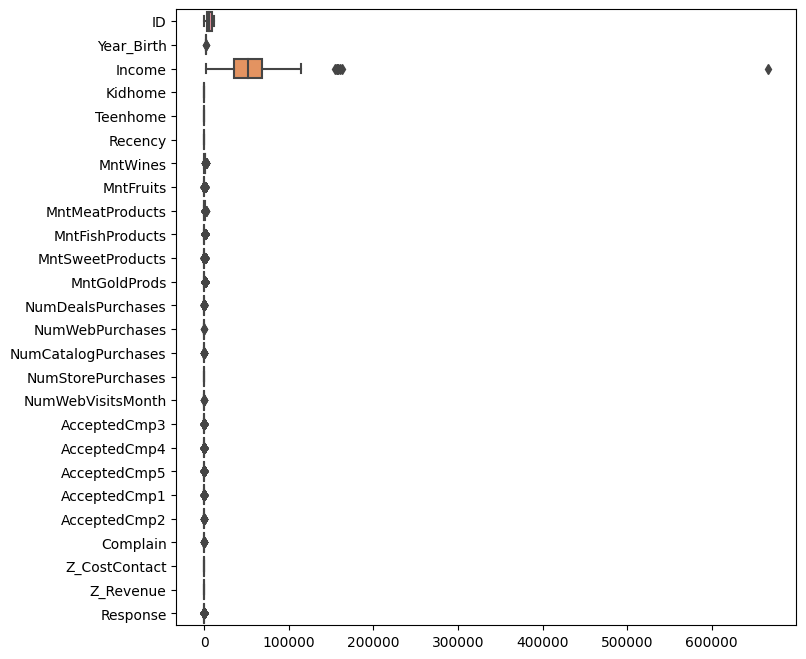

In [12]:

fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=df, orient='h')
plt.show()

As we can see, there is a potential outlier in the "Income" variable. Let's use the interquartile range to determine if it is an outlier and get rid of it if it is an outlier

Number of outliers: 8


<Axes: >

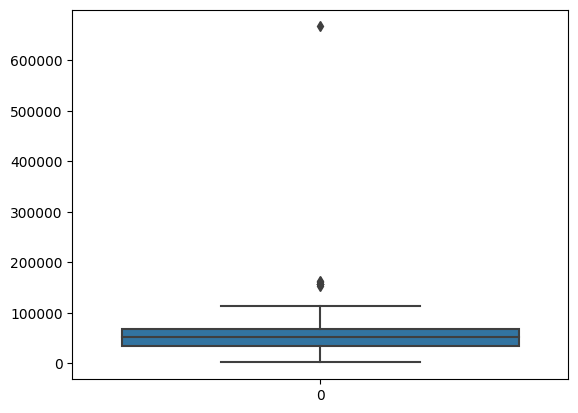

In [13]:
# Calculating the interquartile range
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1

# Finding the amount of outliers
outliers = df[(df['Income'] < (q1 - 1.5 * iqr)) | (df['Income'] > (q3 + 1.5 * iqr))]

# Plotting boxplot for Income
print("Number of outliers:", len(outliers))
sns.boxplot(df['Income'])

<Axes: >

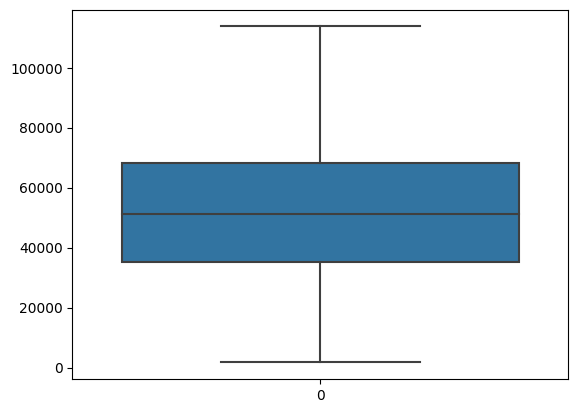

In [14]:
# Getting rid of outliers by filtering data only wihin the IQR
df = df[(df['Income'] >= (q1 - 1.5 * iqr)) & (df['Income'] <= (q3 + 1.5 * iqr))]

#Plot new boxplot
sns.boxplot(df['Income'])

### Modifying columns

Checking the categorical column, grouping them and dropping some of them to make the dataset more detailed.

In [15]:
# Check categorical column
print("Unique values in Education column:", df.Education.unique())
print("Unique values in Marital_Status column:", df.Marital_Status.unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [16]:
# Grouping the Marital_Status to make a new column called Livng_Status
def living_status(row):
    if row == "Single" or row == "Widow" or row == "Alone":
        return "Single"
    elif row == "Together" or row == "Married":
        return "Taken"
    else:
        return "Unknown"
    
# Creating a new column called Living_Status    
df['Living_Status'] = df['Marital_Status'].apply(living_status)
    

In [17]:
# Add new columns such as Age, Total_Spending, Total_Accepted_Campaign, Is_Parent
df['Age'] = 2023 - df['Year_Birth']
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Accepted_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [18]:
# Dropping unrelated variables
df.drop(['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'], axis= 'columns', inplace=True)

# Visual Exploratory Data Analysis


We will start off by exploring each variable by itself

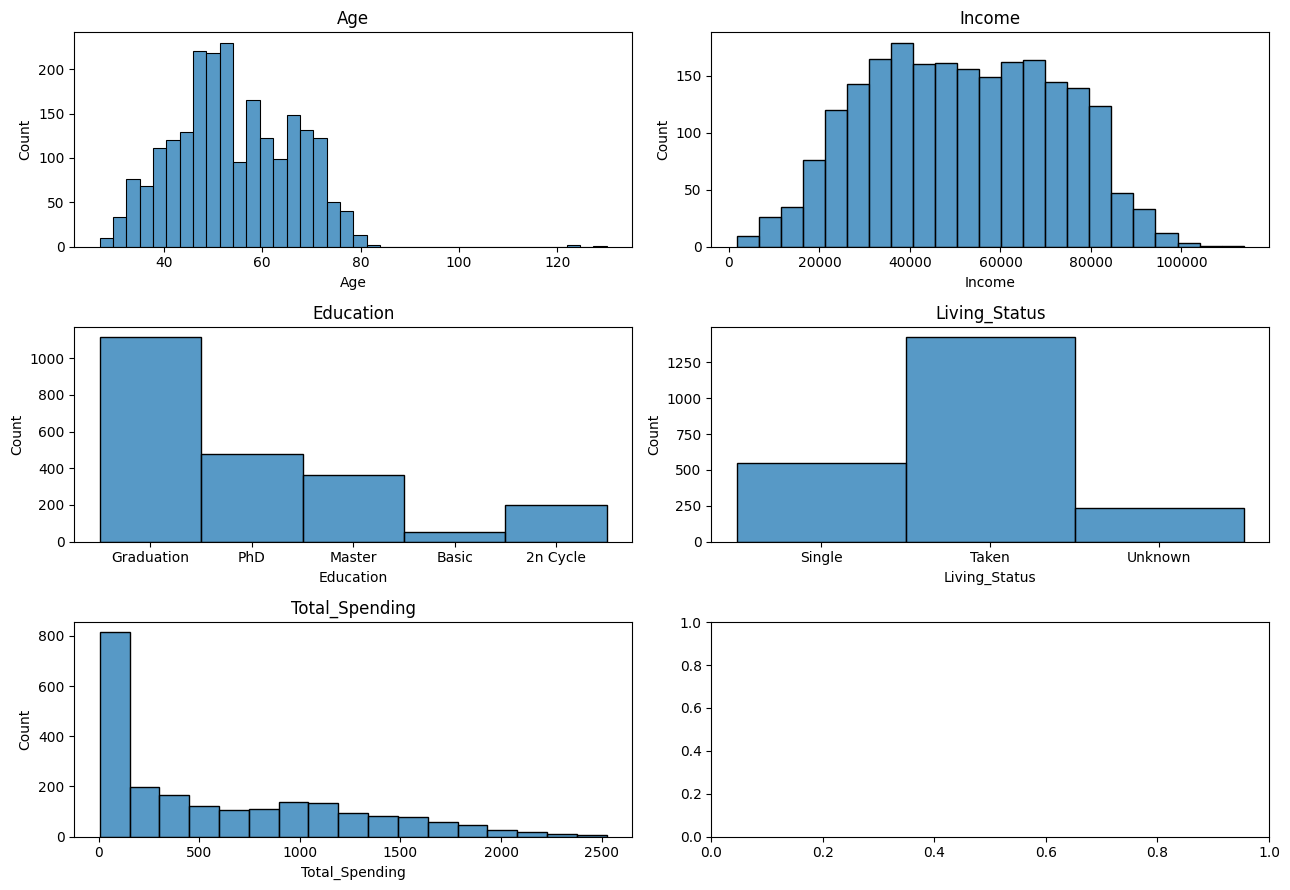

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(13, 9))
axes_flat = iter(axes.flatten()) 

columns = ['Age', 'Income', 'Education', 'Living_Status', 'Total_Spending']

for column in columns:
    ax = next(axes_flat)  
    sns.histplot(ax=ax, data=df[column])
    ax.set_title(column)

plt.tight_layout()  
plt.show() 

From the figure, we can conclude many things from the customers:
* Majority of the customers are adults from 40-60 years of age. However, there seems to be an outlier with age more than 120, I will remove that.
* The income looks like a normal distribution and are well spread across
* More customers are taken than single which correlates to the fact that there are more customers who are parents
* The company isn't doing too well on their marketing campign as there are more customers who didn't accept any campaign and didn't spend any amount on any product

Below is getting rid of age that is higher than 120

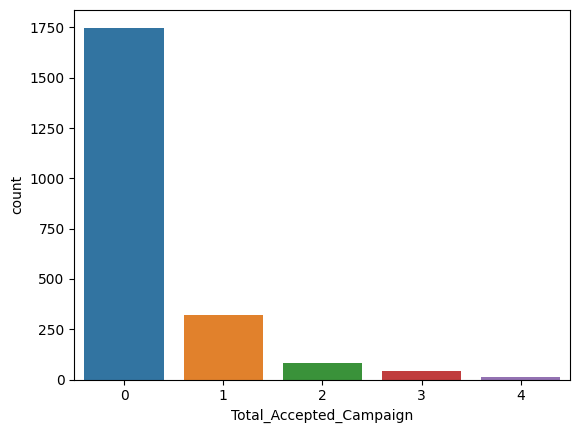

In [20]:
## A barchart of total accepted campaign using sns
sns.countplot(df, x = "Total_Accepted_Campaign");

The companany is not doing well with promoting thier campains as the counts for customer who did not accept any campaign is high. 

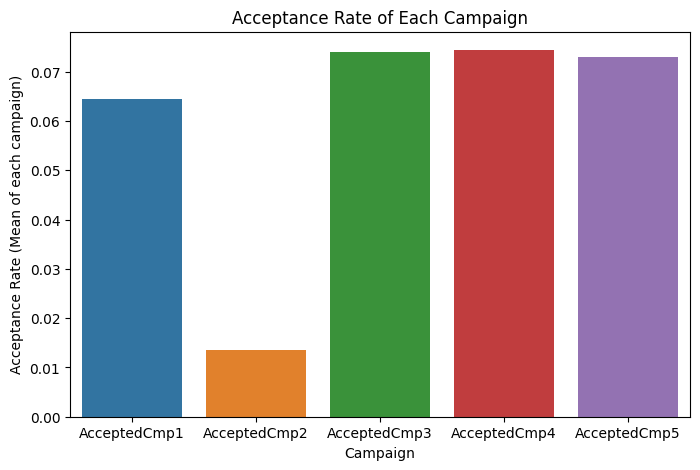

In [41]:
# 
campaign_data = {
    'AcceptedCmp1': df['AcceptedCmp1'].mean(),
    'AcceptedCmp2': df['AcceptedCmp2'].mean(),
    'AcceptedCmp3': df['AcceptedCmp3'].mean(),
    'AcceptedCmp4': df['AcceptedCmp4'].mean(),
    'AcceptedCmp5': df['AcceptedCmp5'].mean()
}

# Convert to DataFrame for easy plotting
campaign_df = pd.DataFrame(list(campaign_data.items()), columns=['Campaign', 'Acceptance Rate'])

# Plotting with Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x='Campaign', y='Acceptance Rate', data=campaign_df)
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate (Mean of each campaign)')
plt.title('Acceptance Rate of Each Campaign')
plt.show()


Here we notice that campaign 2 is the least accepted, almost no customer accpeted this campaign with the mean a bit above 0.01

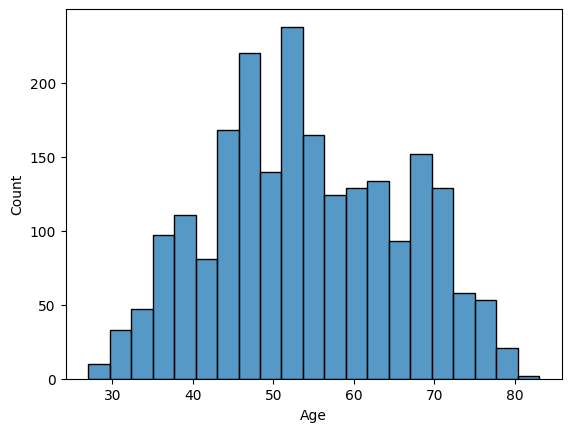

In [22]:
# Handling age outlier
df = df[df['Age'] < 120]
sns.histplot(data=df, x='Age');

We will now explore the relationships between different variables to learn more about the customers

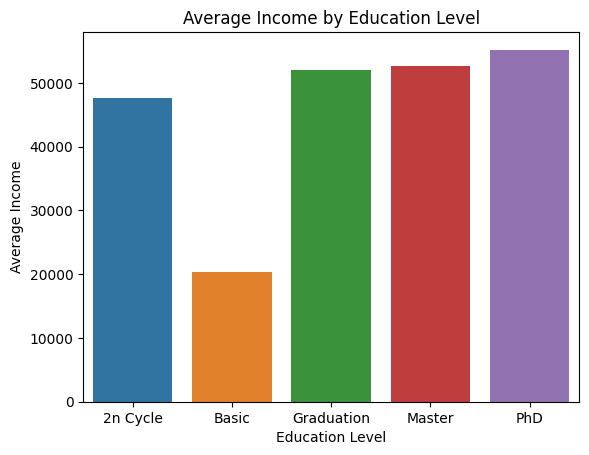

In [23]:
#Barplot for average income by educational level
average_income = df.groupby('Education')['Income'].mean()
sns.barplot(x=average_income.index, y=average_income)
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.title('Average Income by Education Level')
plt.show()

* The average income is the highest in PhD and lowest in the Basic education level.
* This may imply that the education level and averae income is positively correlated

MAE: 229.1841030328826
MSE: 102385.10327555388
RMSE: 319.9767230214627
R2: 0.7170501728422474


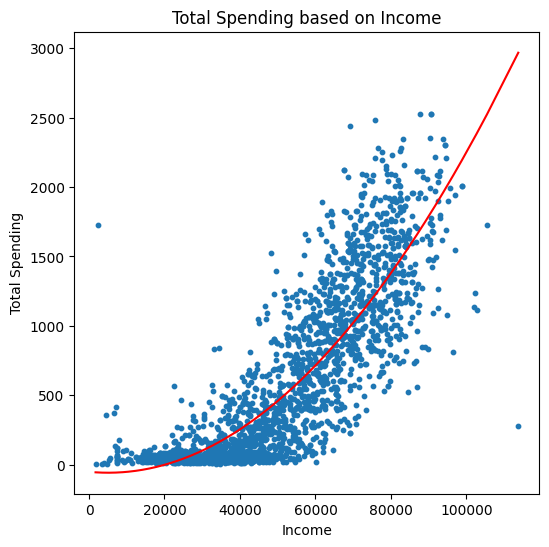

In [24]:
#OSL regression between Income and Total Spent
income = df.Income.to_numpy().reshape(-1,1) #reshape to have one column and as many rows as the sample
total_spending = df.Total_Spending.to_numpy().reshape(-1,1)

def evalModel(actual, prediction):
    print('MAE:', metrics.mean_absolute_error(actual, prediction))
    print('MSE:', metrics.mean_squared_error(actual, prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, prediction)))
    print('R2:', metrics.r2_score(actual, prediction))

def train_n_plot(polynomial_features, x, y):
    x_poly = polynomial_features.fit_transform(income)

    model = LinearRegression()
    model.fit(x_poly, total_spending)
    y_poly_pred = model.predict(x_poly)

    evalModel(total_spending, y_poly_pred)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(income, total_spending, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(income, y_poly_pred), key=sort_axis)
    x2plot, y_poly_pred = zip(*sorted_zip)
    plt.plot(x2plot, y_poly_pred, color='r')
    plt.xlabel('Income')
    plt.ylabel('Total Spending')
    plt.title('Total Spending based on Income')
    plt.show()
    
train_n_plot(PolynomialFeatures(degree=2), income, total_spending)

In [25]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Living_Status', 'Age', 'Total_Spending',
       'Total_Accepted_Campaign', 'Is_Parent'],
      dtype='object')

The R2 score has the value of 0.71 which is satisfactory. I've decided to use OSL rather than linear regression to get a curved line of fit. This fit also shows a positive correlation between the Income and Total Spending which means that the more the customer earns, the more money the customer is likely to spend which makes snese in the real world.

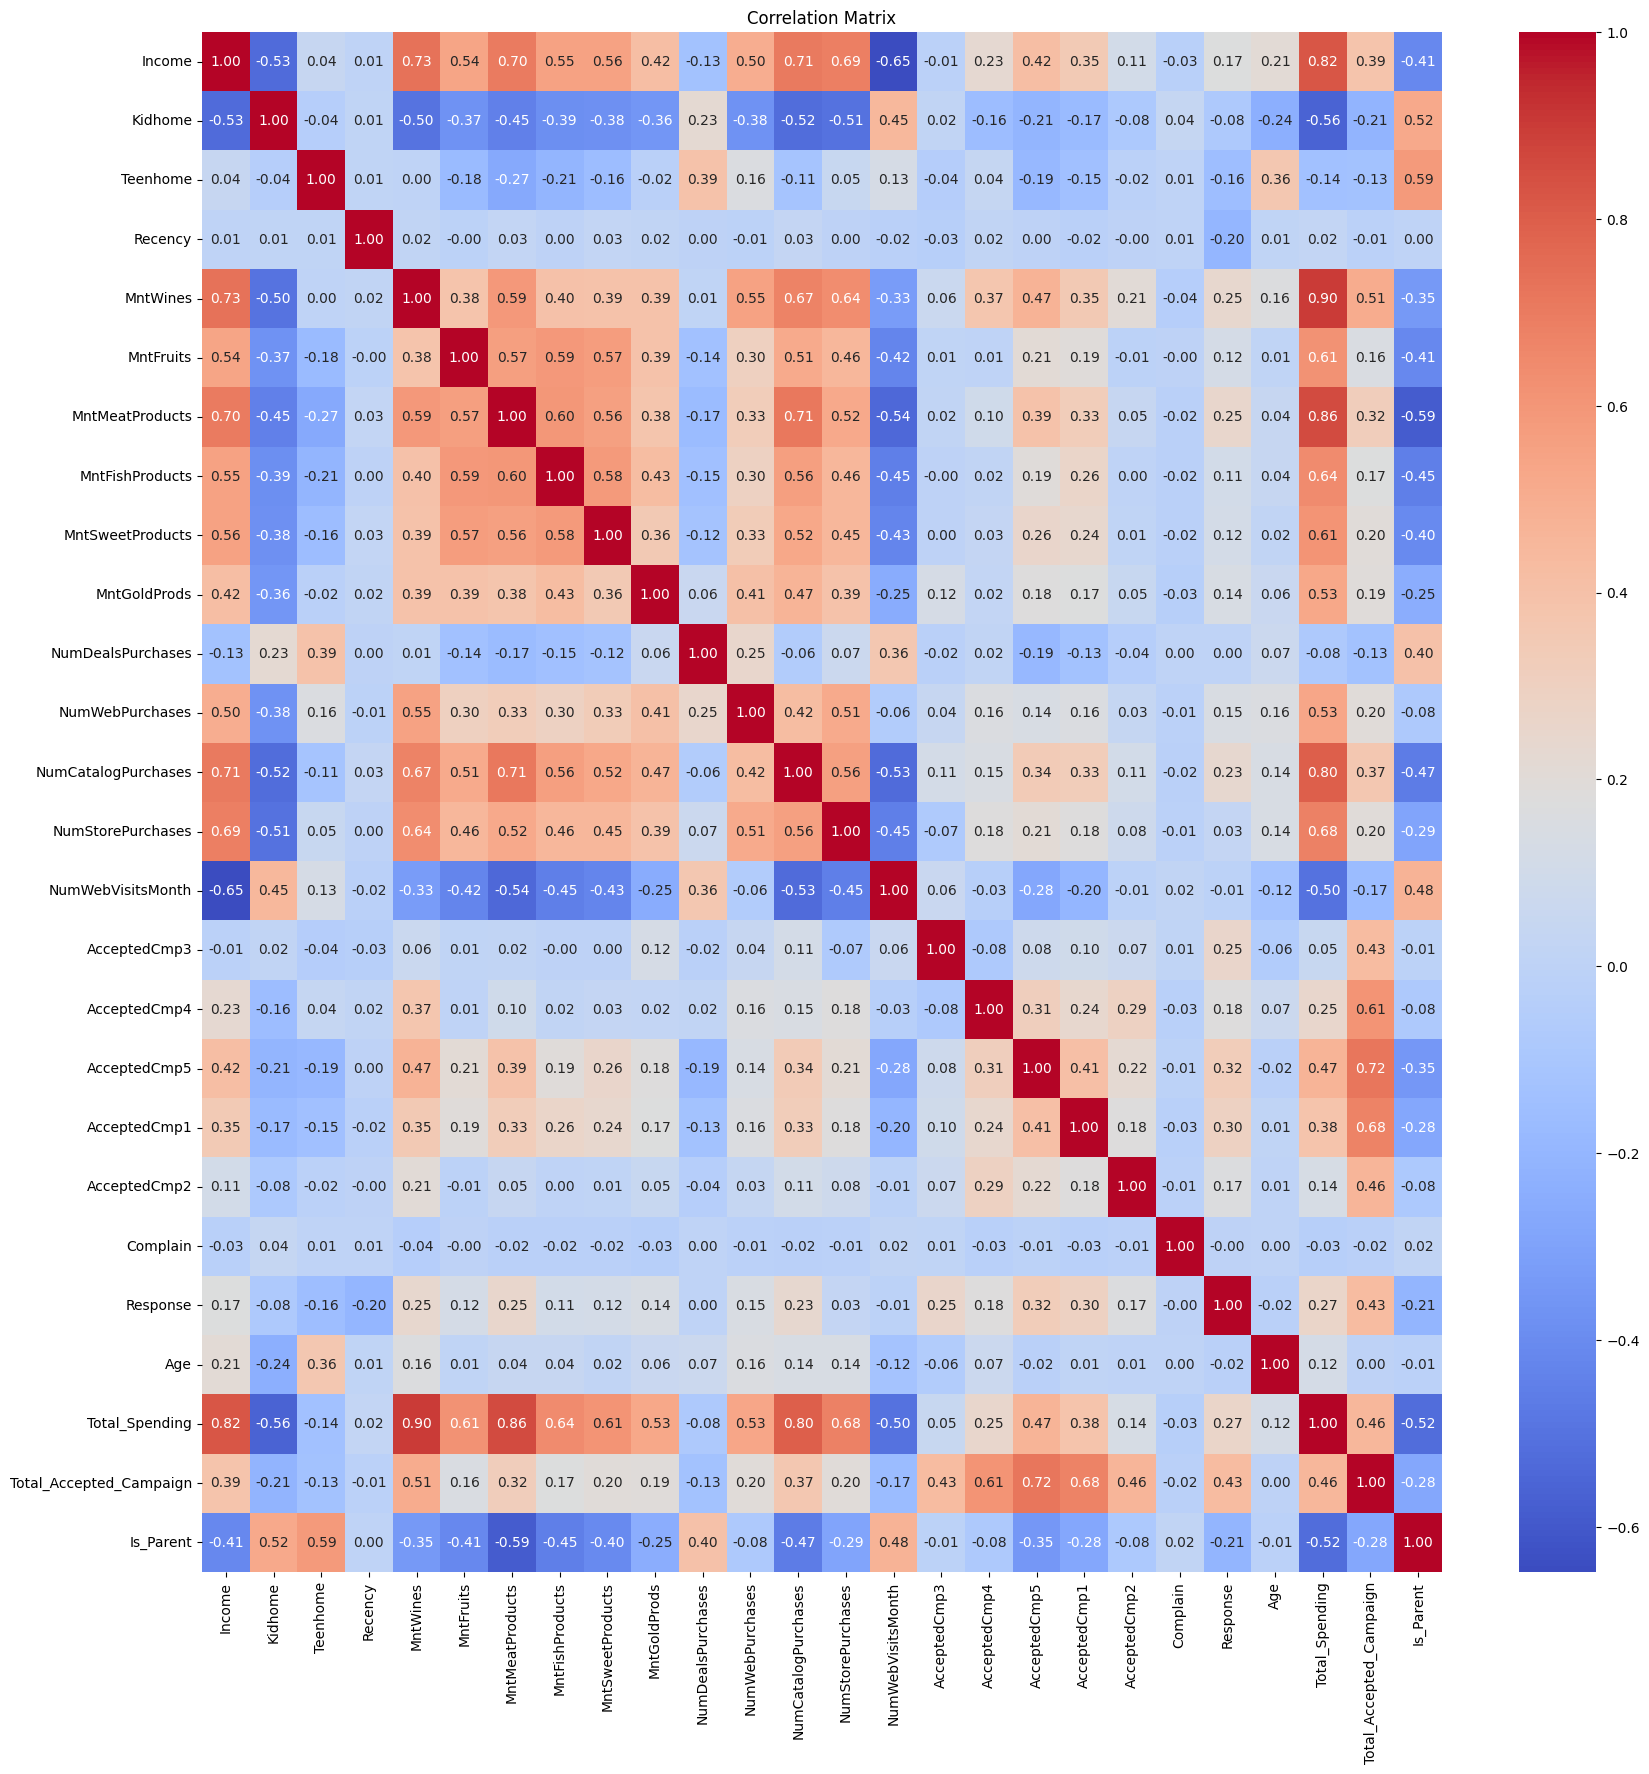

In [26]:
# Correlation matrix
corr_df = df.select_dtypes(np.number)
correlation_matrix = corr_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* There is no variables that should be dropped for each accepted campagins. The correlation isn't too high for any variables.


# Training Model

## Classification or Regression?
Since we are trying to predict categorical value such as accepted campaign, we should be using classification instead of regression. The model will be decision trees used to classify the accepted campaigns a customer might have accepted.

In [27]:
features = pd.get_dummies(df, columns=["Marital_Status", "Education", "Living_Status"])
features.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis='columns', inplace=True)

In [28]:
# To evaluate and score models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary')
    cm = confusion_matrix(y_test, model.predict(X_test))  #.ravel()
    return acc_train, acc_test, precision, recall, f1, cm

In [29]:
# Parameter Tuning
def tune_decision_tree(X_train, y_train):
    parameters = {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [30]:
def model_for_each_campaign_with_tuning(df, tune, features):

    target_list = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
    models, score_results, best_params, confusion_matrixes = [], [], [], []

    for target in target_list:
        X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.3, random_state=0)
        
        if tune:
            model, params = tune_decision_tree(X_train, y_train)
            best_params.append(params)
        else:
            model = DecisionTreeClassifier(random_state=0)
            best_params.append(None)

        models.append(model)
        acc_train, acc_test, precision, recall ,f1, confusion_matrix = evaluate_model(model, X_train, X_test, y_train, y_test)
        confusion_matrixes.append(confusion_matrix)
        
        # Append a single list with all elements
        score_results.append([target, acc_train, acc_test, precision, recall, f1])
    
    # Correct column names for the DataFrame
    score_df = pd.DataFrame(score_results, columns=['Campaign', 'Accuracy_Train', 'Accuracy_Test', 'Precision', "Recall", "F1"])
    
    return models, score_df, best_params, confusion_matrixes


After making 5 models, evaluate each models and compare their scores

In [31]:
models, scores_df, best_params, confusion_matrixes = model_for_each_campaign_with_tuning(df, tune=False, features=features)
print(scores_df)

       Campaign  Accuracy_Train  Accuracy_Test  Precision    Recall        F1
0  AcceptedCmp1             1.0       0.965257   0.756757  0.666667  0.708861
1  AcceptedCmp2             1.0       0.986405   0.375000  0.428571  0.400000
2  AcceptedCmp3             1.0       0.956193   0.750000  0.709091  0.728972
3  AcceptedCmp4             1.0       0.930514   0.490566  0.577778  0.530612
4  AcceptedCmp5             1.0       0.962236   0.688889  0.738095  0.712644


Campaign 2 model and Campaign 4 model has low precision and recall score. Let's observe the confusion matrix.

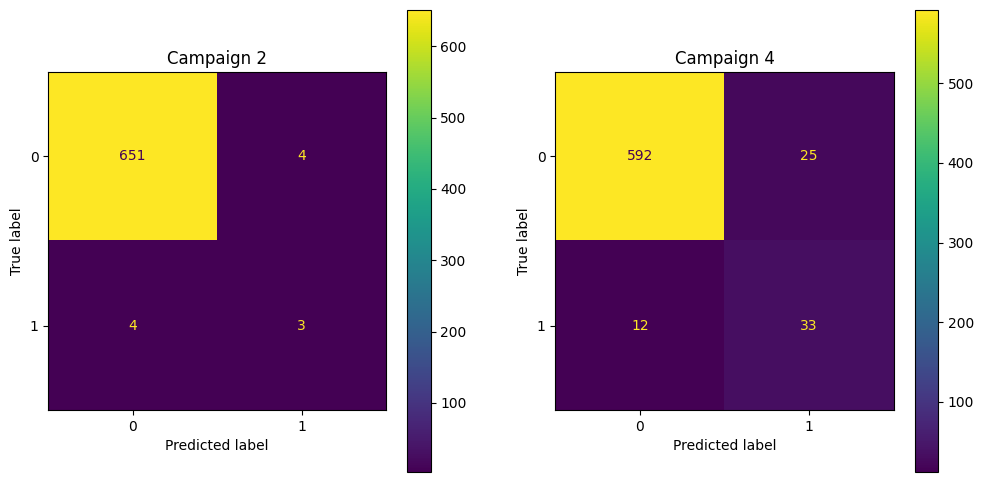

In [42]:
# Plot the confusion matrix for Campaign 2 and 4 models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes_flat = iter(axes.flatten())
for i in [1, 3]:
    ax = next(axes_flat)
    ConfusionMatrixDisplay(confusion_matrixes[i]).plot(ax=ax)
    ax.set_title(f'Campaign {i+1}')

From the confusion matrix, campaign 2 has a higher rate of false positive and false negative than true positives, this may be because of the very low rate of acceptance. The model might be performing the same as other models. Campaign 4 has a higher rate of false positive and true positive.

In [33]:
models, scores_df, best_params, confusion_matrixes = model_for_each_campaign_with_tuning(df, tune=True, features=features)
print(scores_df)

       Campaign  Accuracy_Train  Accuracy_Test  Precision    Recall        F1
0  AcceptedCmp1        0.967596       0.951662   0.656250  0.500000  0.567568
1  AcceptedCmp2        0.998056       0.987915   0.428571  0.428571  0.428571
2  AcceptedCmp3        0.981854       0.950151   0.711538  0.672727  0.691589
3  AcceptedCmp4        0.970188       0.944109   0.568966  0.733333  0.640777
4  AcceptedCmp5        0.981205       0.963746   0.736842  0.666667  0.700000


Paremeter tuning does improve the precision and recall score for 2 and 4, however it worsens the other's scores.

In [34]:
campaigns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']
# Plot the tree for each model
for model, campaign in zip(models, campaigns):
    plt.figure(figsize=(20, 20))
    plot_tree(model, filled=True, feature_names=features.columns)
    plt.title(campaign)
    plt.savefig(campaign + '.png')
    plt.close()

## What can we conclude about the campaigns?
### This is a conclusion of campaigns from observing the decision trees

### Campaign 1: Not too much on wines
* Total accepted campaign must be more than 1.
* If the customer accepts 3 or more campaigns, they will surely accept campaign 1
* Must not spend more than 1075 dollars on wine products.

### Campaign 2: All kinds of products
* If the customer accepts 4 or more campaigns, they will surely accept campaign 2
* The customer buys the product within 1 day
* The customers have education level higher than 2nd year college.

### Campaign 3: Gold products
* Total accepted campaign must be more than 1.
* Customer prefer to shop online than in store and has high web visits per month.
* Prefer gold products than every other products.

### Campaign 4L Wines and meat
* Total accpeted campaign must be more than 1. 
* The customer doesn't spend a lot on fruit. However, the customer spends a lot on wines and meat products.
* Usually non parents with high incomes compared to other customers, (>90000 dollars)

### Campaign 5: Fish
* Doesn't really matter on how many campagins the customer have accepted
* Graduated customer with salary more than 76k will accept the campaign.
* Customer prefer to spend more on fish products. 

## How might this model be useful for the company?
* The company can use this model to adapt a recommendation system where the customer can be recommended different campaigns based on their incomes, product preference, etc.
  
* The company can explore the decision tree further to gain even more insights on the customer's characteristics. Such as the amount of income, children, etc.

## What are the flaws of this model?

* A decision tree predicts only one outcome. In this case it only predicts that a customer might pick a campaign. However, it is also possible for the customer to pick multiple campaigns which the decision tree did not handle.
  
* The information we have on each campaign is very limited so we are not able to come to a realistic conclusion as to what behavior the customer would have to pick each campaign. The dataset could've put more information about the dataset